In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
df_ped=pd.read_csv('Fixations\WithRecordingTime\gaze_points_cyc_output.csv')
df_ped =df_cyc.dropna()

In [ ]:
def min_max_normalize(series):
    return (series - series.min()) / (series.max() - series.min())

In [ ]:
df_ped['Normalized X'] = min_max_normalize(df_ped['Gaze point X'])
df_ped['Normalized Y'] = min_max_normalize(df_ped['Gaze point Y'])
df_ped['Euclidean Distance'] = np.sqrt(df_ped['Normalized X']**2 + df_ped['Normalized Y']**2)

In [ ]:
df_ped.to_csv('Fixations\WithRecordingTime\gaze_dispersion_cyc.csv', index=False)  

In [13]:
df_ped=pd.read_csv('Fixations\WithRecordingTime\gaze_dispersion_peds.csv')
df_ped =df_ped.dropna()
df_cyc=pd.read_csv('Fixations\WithRecordingTime\gaze_dispersion_cyc.csv')
df_cyc =df_cyc.dropna()

In [14]:
grouped_gaze_dispersion_ped = df_ped.groupby(['participant no', 'way', 'alert']).size().reset_index(name='Euclidean Distance')
grouped_gaze_dispersion_ped

grouped_gaze_dispersion_cyc = df_cyc.groupby(['participant no', 'way', 'alert']).size().reset_index(name='Euclidean Distance')
grouped_gaze_dispersion_cyc

,participant no,way,alert,Euclidean Distance
0,c10,approach,Baseline,305
1,c10,approach,Bell,292
2,c10,approach,Continuous,287
3,c10,approach,Flash Light,288
4,c10,approach,Voice,308
...,...,...,...,...
75,c8,overtake,Baseline,295
76,c8,overtake,Bell,241
77,c8,overtake,Continuous,278
78,c8,overtake,Flash Light,314


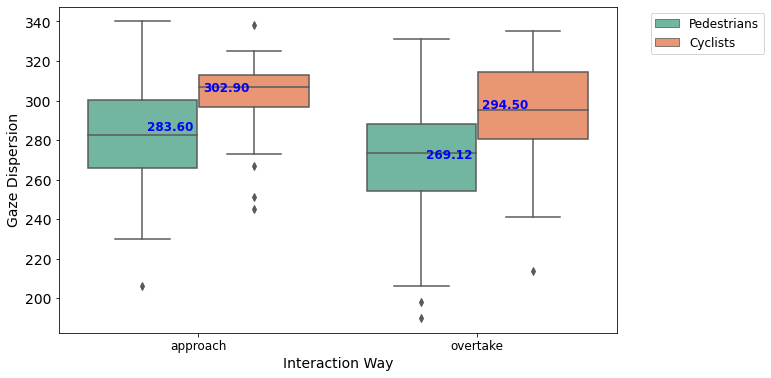

In [16]:
grouped_gaze_dispersion_ped['group'] = 'Pedestrians'
grouped_gaze_dispersion_cyc['group'] = 'Cyclists'

# Combine both dataframes
df_combined = pd.concat([grouped_gaze_dispersion_ped, grouped_gaze_dispersion_cyc])

plt.rcParams.update({
    'font.size': 12,      # Set font size for all text
    'font.family': 'sans-serif',  # Change the font family (e.g., 'serif', 'sans-serif', etc.)
    'axes.titlesize': 16,    # Font size for title
    'axes.labelsize': 14,    # Font size for x and y labels
    'xtick.labelsize': 12,   # Font size for x ticks
    'ytick.labelsize': 14,   # Font size for y ticks
    'legend.fontsize': 12    # Font size for the legend
})


# Create the boxplot
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x='way', y='Euclidean Distance', hue='group', data=df_combined, palette="Set2")

# Calculate means for both pedestrian and cyclist fixations and add text
mean_values = df_combined.groupby(['way', 'group'])['Euclidean Distance'].mean().reset_index()

# Add mean values as text annotations on the plot
for i, row in mean_values.iterrows():
    x_pos = list(df_combined['way'].unique()).index(row['way']) + (0.1 if row['group'] == 'Cyclists' else -0.1)
    plt.text(x_pos, row['Euclidean Distance'], f'{row["Euclidean Distance"]:.2f}', color='blue', ha="center", va="bottom", fontweight='bold')

# Set plot title and labels
#plt.title('Number of Fixations: Pedestrians and Cyclists')
plt.xlabel('Interaction Way')
plt.ylabel('Gaze Dispersion')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()